In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
bli_df = pd.read_csv("./data/OECD_BLI.csv")

bli_df_countries = bli_df[bli_df['Indicator'] == 'Life satisfaction']
bli_df_countries = bli_df_countries[bli_df_countries['Inequality'] == 'Total']
selected_columns = ['Country', 'Value']
bli_df_countries = bli_df_countries[selected_columns]

bli_df_countries.head()

,Country,Value
1722,Australia,7.1
1723,Austria,7.2
1724,Belgium,6.8
1725,Canada,7.0
1726,Czechia,6.9


In [3]:
bli_df_countries = bli_df_countries[bli_df_countries['Country'] != 'OECD - Total']

bli_df_countries = bli_df_countries.sort_values(by='Value')
bli_df_countries = bli_df_countries.reset_index(drop=True)

bli_df_countries.head()

,Country,Value
0,Türkiye,4.9
1,South Africa,4.9
2,Russia,5.5
3,Colombia,5.7
4,Portugal,5.8


/var/folders/pg/3drzg8ds5lq96zffdylb9qv00000gn/T/ipykernel_7482/3185955702.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


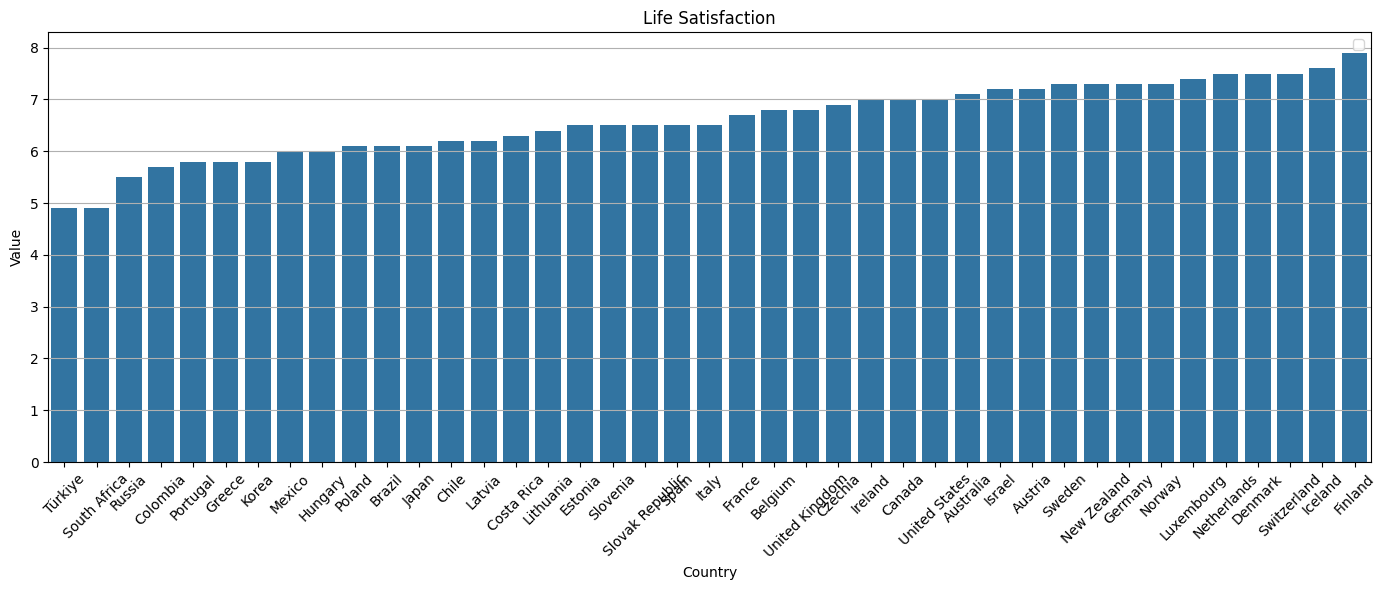

In [4]:
plt.figure(figsize=(14, 6))
sns.barplot(x='Country', y='Value', data=bli_df_countries)

plt.xticks(rotation=45)
plt.title('Life Satisfaction')
plt.xlabel('Country')
plt.ylabel('Value')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()

In [5]:
imf_df = pd.read_csv("./data/IMF_GDP.csv", delimiter=";")

imf_df.rename(columns={'GDP per capita, current prices\r\n (U.S. dollars per capita)': 'Country'}, inplace=True)
selected_columns_imf = ['Country', '2023']
imf_df = imf_df[selected_columns_imf]
imf_df = imf_df[:196]
imf_df = imf_df[imf_df['2023'] != 'no data']


In [6]:
imf_df.head()

,Country,2023
1,Albania,"7956,559"
2,Algeria,"5323,635"
3,Andorra,"43784,571"
4,Angola,"2565,912"
5,Antigua and Barbuda,"19123,213"


In [7]:
merged_df = pd.merge(bli_df_countries, imf_df, on='Country')

merged_df.rename(columns={'Value': 'Life satisfaction', '2023': 'GDP per capita (USD)'}, inplace=True)

merged_df

,Country,Life satisfaction,GDP per capita (USD)
0,South Africa,4.9,"6138,248"
1,Colombia,5.7,"6971,669"
2,Portugal,5.8,"27880,066"
3,Greece,5.8,"22805,197"
4,Mexico,6.0,"13641,613"
5,Hungary,6.0,"22146,885"
6,Poland,6.1,"21995,995"
7,Brazil,6.1,"10642,437"
8,Japan,6.1,"33805,939"
9,Chile,6.2,"16815,783"


/var/folders/pg/3drzg8ds5lq96zffdylb9qv00000gn/T/ipykernel_7482/2064386794.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


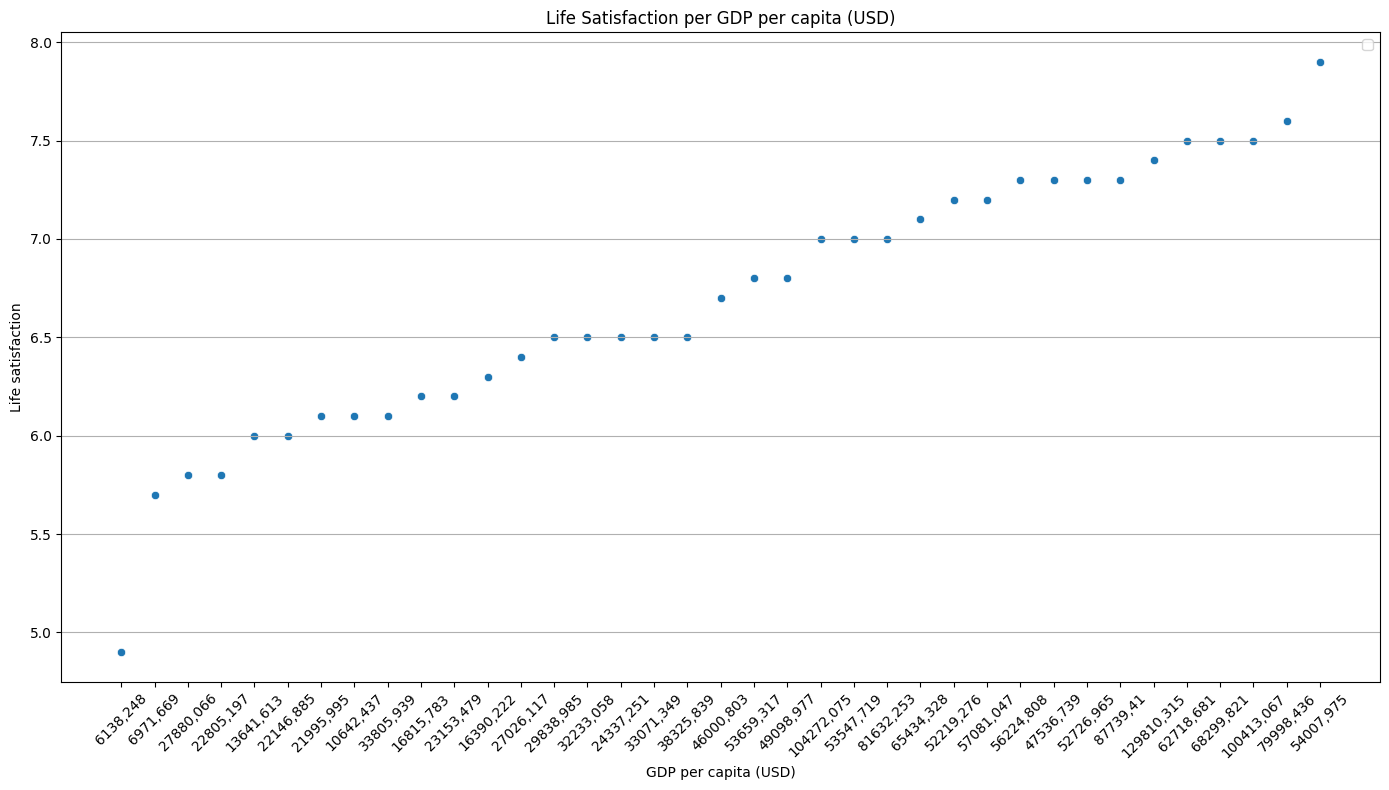

In [8]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='GDP per capita (USD)', y='Life satisfaction', data=merged_df)


plt.xticks(rotation=45)
plt.title('Life Satisfaction per GDP per capita (USD)')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [9]:
merged_df['GDP per capita (USD)'] = merged_df['GDP per capita (USD)'].apply(lambda x: x.replace(',', '.'))
merged_df['GDP per capita (USD)'] = merged_df['GDP per capita (USD)'].astype(float)


filtered_out_columns = ['Belgium', 'Colombia']
merged_df_subset = merged_df[~merged_df['Country'].isin(filtered_out_columns)]
merged_df_subset = merged_df_subset.reset_index(drop=True)

In [10]:
merged_df

,Country,Life satisfaction,GDP per capita (USD)
0,South Africa,4.9,6138.248
1,Colombia,5.7,6971.669
2,Portugal,5.8,27880.066
3,Greece,5.8,22805.197
4,Mexico,6.0,13641.613
5,Hungary,6.0,22146.885
6,Poland,6.1,21995.995
7,Brazil,6.1,10642.437
8,Japan,6.1,33805.939
9,Chile,6.2,16815.783


In [11]:
type(merged_df_subset['GDP per capita (USD)'][0])

numpy.float64

In [12]:
print(merged_df[merged_df['Country'] == 'Belgium'])
print("\n")
print(merged_df[merged_df['Country'] == 'Colombia'])

    Country  Life satisfaction  GDP per capita (USD)
19  Belgium                6.8             53659.317


    Country  Life satisfaction  GDP per capita (USD)
1  Colombia                5.7              6971.669


# Training the model

In [13]:
import sklearn.linear_model
import numpy as np

## Linear Regression

In [24]:
merged_df_subset.to_csv("training_data.csv")

In [14]:
X = merged_df_subset['GDP per capita (USD)'].values.reshape(-1, 1)
y = merged_df_subset['Life satisfaction'].values

model = sklearn.linear_model.LinearRegression()

model.fit(X, y)

LinearRegression()

In [15]:
X_belgium = [[53659.317]]
print(model.predict(X_belgium))

[6.82875301]


In [16]:
X_colombia = [[6971.669]]
print(model.predict(X_colombia))

[6.01218407]


## KNeighbors

In [17]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(X, y)

KNeighborsRegressor(n_neighbors=3)

In [18]:
X_belgium = [[53659.317]]
print(knn.predict(X_belgium))

[7.4]


In [19]:
X_colombia = [[6971.669]]
print(knn.predict(X_colombia))

[5.66666667]


# Saving and downloading model

In [22]:
import joblib

# Assuming you have a scikit-learn model named `model`
joblib.dump(model, 'model.pkl')


['model.pkl']